In [ ]:
# Run Jupyter Notebook from GitHub repository on Google Colab
# https://saturncloud.io/blog/how-can-i-run-notebooks-of-a-github-project-in-google-colab/

# Run this cell if on Google Colab.

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Run this cell if in Google Colab after running the cell above.
# Paste the GitHub repository link where it says <repository-link>. (Remove the brackets.)

!git clone <repository-link>

In [ ]:
%cd <repository-name>/notebooks

In [1]:
# Import text from Excel worksheet.

import pandas as pd

file_path = "C:\\Users\\u0396993\\Documents\\junk\\ParagraphData\\SampleDocuments.xlsx"
file_df = pd.read_excel(file_path)
file_df

,doc_id,doc_text
0,1,Health informatics is the field of science and...
1,2,Health informatics is a spectrum of multidisci...
2,3,Telehealth is the distribution of health-relat...


In [3]:
# Only needs to run if package not already installed.
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
# Only needs to run if not already installed.
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Split text in each cell into lists with separate sentences.

import spacy

nlp = spacy.load("en_core_web_sm")
file_df["doc_text"] = file_df["doc_text"].apply(lambda x: [sent.text for sent in nlp(x).sents])

In [3]:
file_df

,doc_id,doc_text
0,1,[Health informatics is the field of science an...
1,2,[Health informatics is a spectrum of multidisc...
2,3,[Telehealth is the distribution of health-rela...


In [4]:
# Put each sentence into a separate row in the dataframe.

file_df = file_df.explode("doc_text", ignore_index=True)

In [5]:
# Update the column headings.

file_df.rename(columns={"doc_text": "sent_text"}, inplace=True)
file_df.index.name = "sent_id"

In [6]:
# Show the contents of the dataframe.

file_df

,doc_id,sent_text
sent_id,,
0,1,Health informatics is the field of science and...
1,1,The health domain provides an extremely wide v...
2,2,Health informatics is a spectrum of multidisci...
3,2,The disciplines involved combines medicine fie...
4,2,"In academic institutions, medical informatics ..."
5,2,In some countries term informatics is also use...
6,3,Telehealth is the distribution of health-relat...
7,3,It allows long-distance patient and clinician ...
8,3,"Telemedicine is sometimes used as a synonym, o..."


In [8]:
# Add the sentence text and IDs to lists for further processing.

sent_id = file_df.index.values.tolist()
sent_text = file_df.sent_text.values.tolist()
sent_id

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
# Only needs to run if not already installed.
!pip install sentence-transformers

In [9]:
# Select the model to use for sentence embeddings.

from sentence_transformers import SentenceTransformer

# Models - https://huggingface.co/models?library=sentence-transformers
model = SentenceTransformer('all-mpnet-base-v2')

In [10]:
# Create the sentence embeddings

embeddings1 = model.encode(sent_text)

In [14]:
# clustering https://www.youtube.com/watch?v=OlhNZg4gOvA time index 22:00

from sklearn.cluster import KMeans
import numpy as np

# normalize the embeddings to unit length
embeddings_norm = embeddings1 / np.linalg.norm(embeddings1, axis=1, keepdims=True)

In [15]:
embeddings_norm

array([[-0.01713644,  0.04019957, -0.04108511, ...,  0.000791  ,
         0.02791633,  0.01096726],
       [-0.02513368,  0.06061538, -0.05108213, ..., -0.05503735,
        -0.03155533, -0.0090589 ],
       [-0.02089378,  0.03663196, -0.04660625, ..., -0.00464547,
         0.00224199, -0.00843683],
       ...,
       [ 0.01072114,  0.00253216, -0.02307183, ...,  0.01498237,
        -0.01821447, -0.00647967],
       [ 0.00605699, -0.015051  , -0.02631763, ...,  0.0253723 ,
        -0.02271961, -0.0167999 ],
       [ 0.00942042, -0.00838958, -0.02889893, ...,  0.01021517,
        -0.02342993, -0.01540635]], dtype=float32)

In [11]:
# Import the libraries needed to create the elbow diagram.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

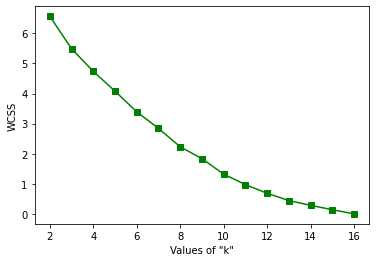

In [16]:
# Look at the elbow diagram to help determine appropriate number of clusters to create.

# determining the maximum number of clusters
# using the simple method
limit = file_df.shape[0]
 
# selecting optimal value of 'k'
# using elbow method
 
# wcss - within cluster sum of
# squared distances
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(embeddings_norm)
    wcss[k] = model.inertia_
     
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Create the desired number of clusters. (Update the value for ClusterCount.)

ClusterCount = 8

clustering_model = KMeans(n_clusters=ClusterCount)
clustering_model.fit(embeddings_norm)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

[6 1 6 1 1 6 7 3 7 0 5 2 4 2 2 2]


In [18]:
# Add the cluster assignments to the dataframe in a new column.

file_df['cluster8'] = cluster_assignment
file_df

,doc_id,sent_text,cluster8
sent_id,,,
0,1,Health informatics is the field of science and...,6
1,1,The health domain provides an extremely wide v...,1
2,2,Health informatics is a spectrum of multidisci...,6
3,2,The disciplines involved combines medicine fie...,1
4,2,"In academic institutions, medical informatics ...",1
5,2,In some countries term informatics is also use...,6
6,3,Telehealth is the distribution of health-relat...,7
7,3,It allows long-distance patient and clinician ...,3
8,3,"Telemedicine is sometimes used as a synonym, o...",7


In [20]:
# Get file path in preparation for saving output to Excel.

import os

OutputFile = os.path.split(file_path)[0] + "\\Clusters_" + os.path.split(file_path)[1]
OutputFile

'C:\\Users\\u0396993\\Documents\\junk\\ParagraphData\\Clusters_SampleDocuments.xlsx'

In [22]:
# Save the dataframe to an Excel workbook in the same folder as the original file.

with pd.ExcelWriter(OutputFile) as writer:
    
    # Write the scores dataframe to the Excel workbook. Leave blank rows at the top.
    file_df.to_excel(writer, sheet_name="Sheet1", startrow=0, startcol=0)
    
print('Done.')

Done.
